# **Práticando com Seaborn...**

---

## **Importando as bilbiotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## **Carregando Dataset**

In [3]:
# Utilizaremos os dados disponilizados pelo próprio seaborn, chamado penguins
df = sns.load_dataset('penguins')
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## **Entendendo um pouco sobre os dados**

In [16]:
df.shape

(344, 7)

In [17]:
# algumas estatisticas do dataset
df.describe()

,comprimento_bico_mm,largura_bico_mm,comprimento_asa_mm,massa_corporal_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
# imprimindo as colunas existentes no dataset
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
# verificando valores nulos
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
# informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## **Tratamento dos dados**

In [14]:
# renomeando as colunas
df.columns = ['especies', 'ilha', 'comprimento_bico_mm', 'largura_bico_mm', 'comprimento_asa_mm', 'massa_corporal_g', 'sexo']

In [15]:
df.head()

,especies,ilha,comprimento_bico_mm,largura_bico_mm,comprimento_asa_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


---

# **Plotando alguns gráficos**

## **Gráficos de dispersão e distribuição das variáveis**

### **Displot**

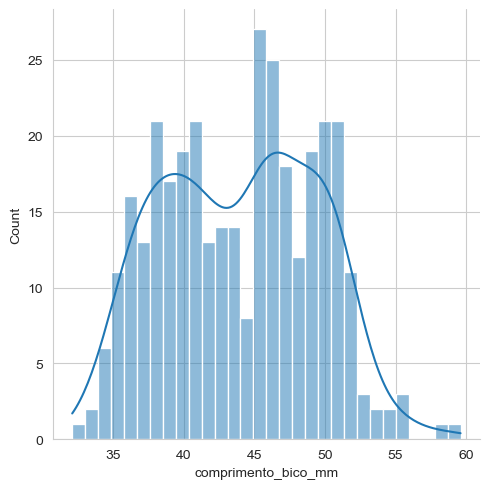

In [23]:
# para plotar a linha de distribuição basta definirmos o parametro 'kde' como True
sns.displot(df['comprimento_bico_mm'], bins = 30, kde = True)

### **Jointplot**

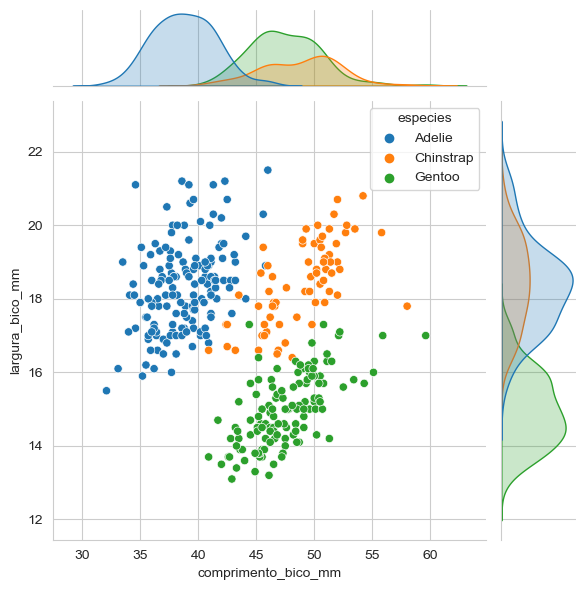

In [35]:
# Podemos utilizar o parametro 'hue' para dividir o gráfico em subcategorias
sns.jointplot(data = df, x = 'comprimento_bico_mm', y = 'largura_bico_mm', hue = 'especies')

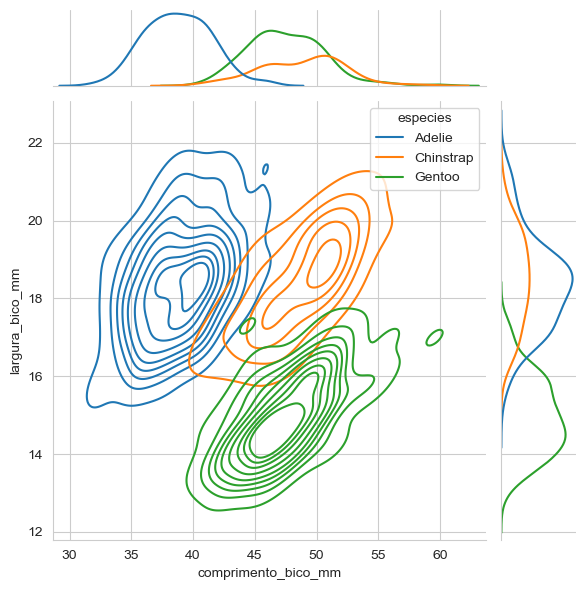

In [38]:
# podemos alterar o tipo de jointplot com o paramentro 'kind' onde temos: “scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
sns.jointplot(data = df, x = 'comprimento_bico_mm', y = 'largura_bico_mm', hue = 'especies', kind = 'kde')

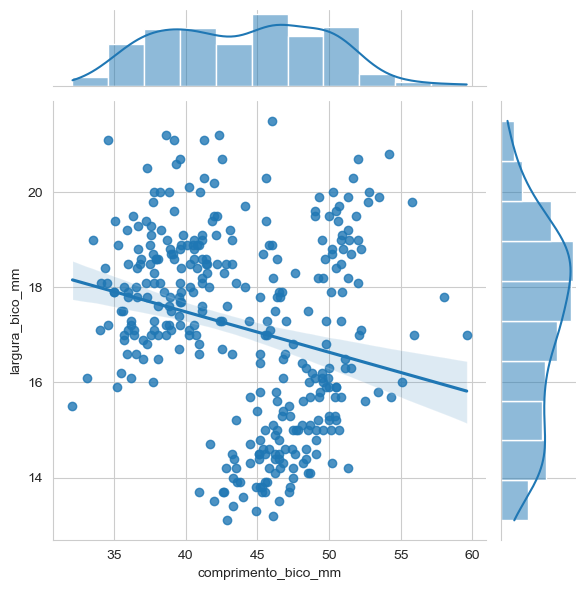

In [39]:
sns.jointplot(data = df, x = 'comprimento_bico_mm', y = 'largura_bico_mm', kind = 'reg')

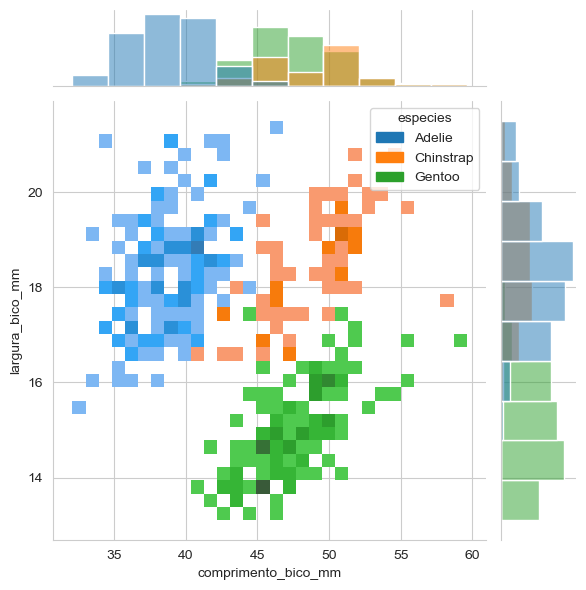

In [41]:
sns.jointplot(data = df, x = 'comprimento_bico_mm', y = 'largura_bico_mm', kind = 'hist', hue = 'especies', bins = 30)

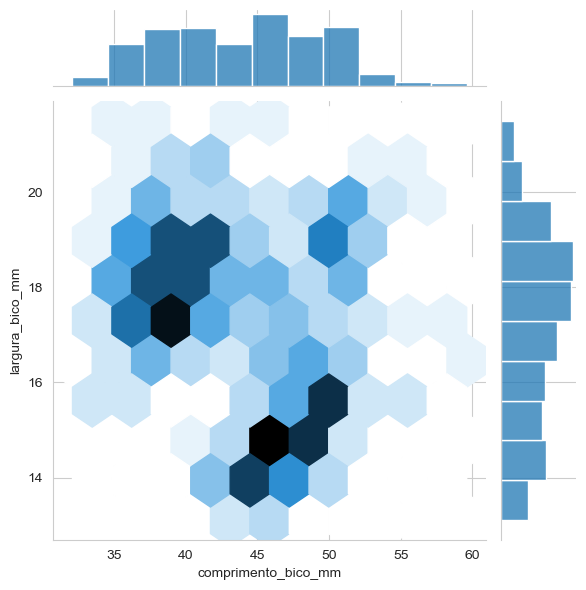

In [43]:
sns.jointplot(data = df, x = 'comprimento_bico_mm', y = 'largura_bico_mm', kind = 'hex')

### **Lmplot**

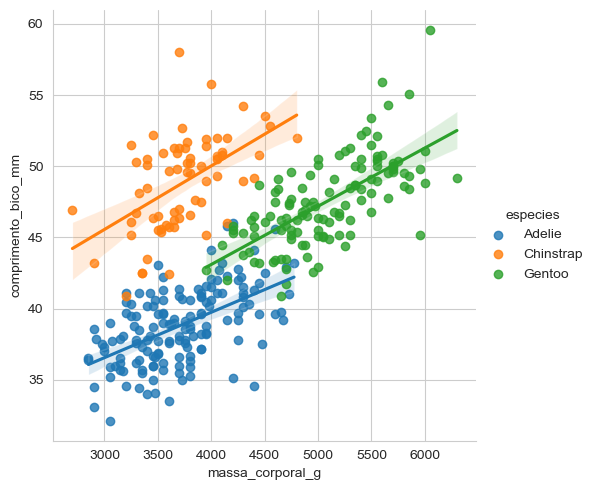

In [48]:
sns.lmplot(data = df, x = 'massa_corporal_g', y = 'comprimento_bico_mm', hue = 'especies')

### **Pairplot**

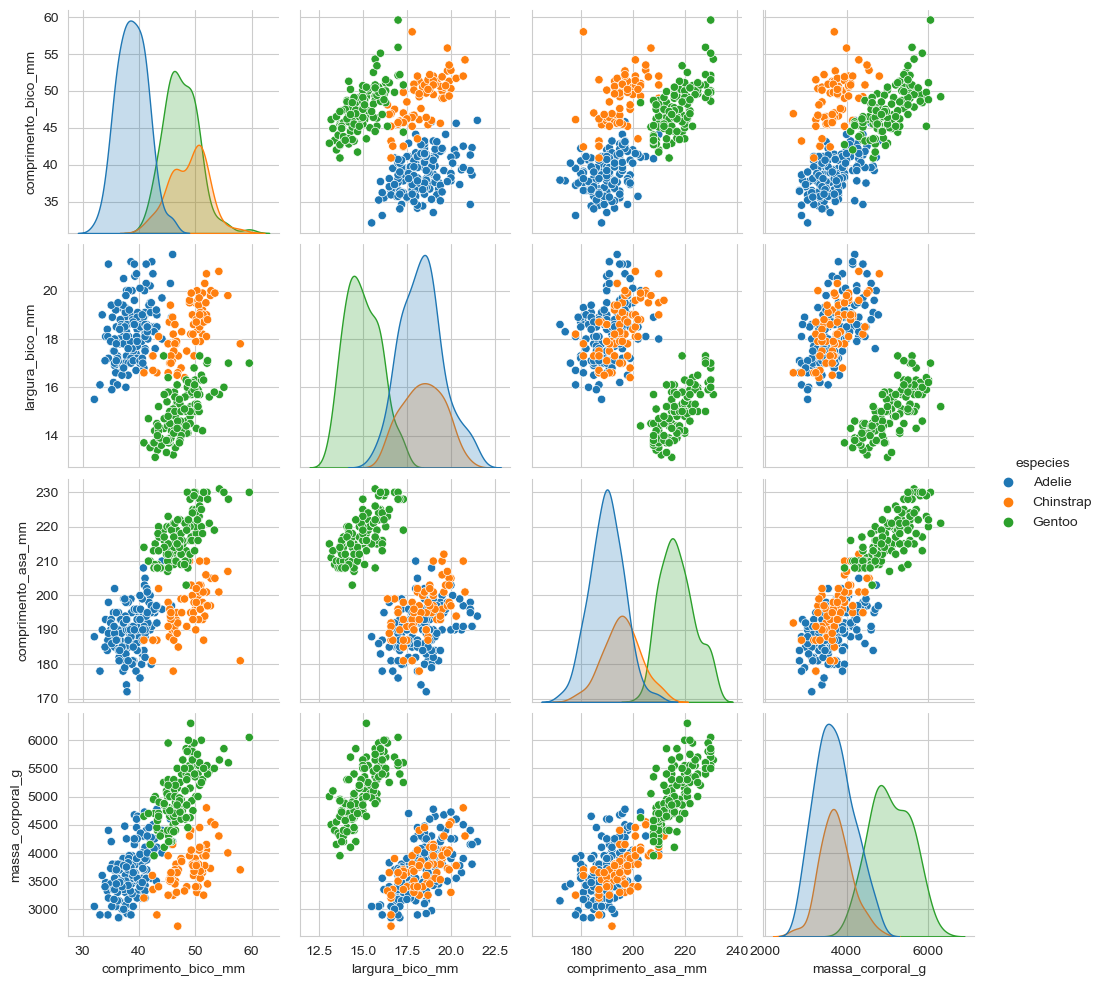

In [50]:
# gráfico mais pesado de desempenhar, devido a trazer todas as informações do dataset
sns.pairplot(df, hue = 'especies')

## **Gráficos categóricos**

### **Barplot**

<Axes: xlabel='especies', ylabel='comprimento_bico_mm'>

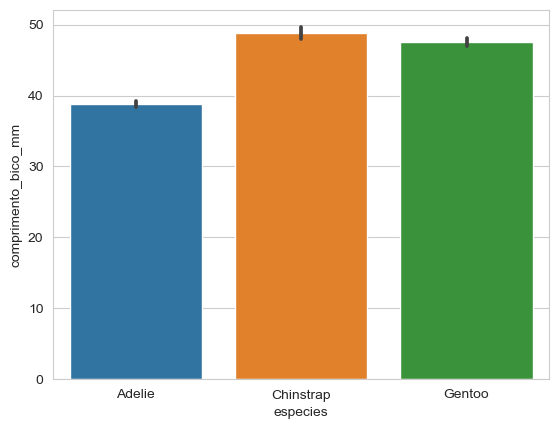

In [56]:
sns.barplot(data = df, x = 'especies', y = 'comprimento_bico_mm')

### **Countplot**

<Axes: xlabel='especies', ylabel='count'>

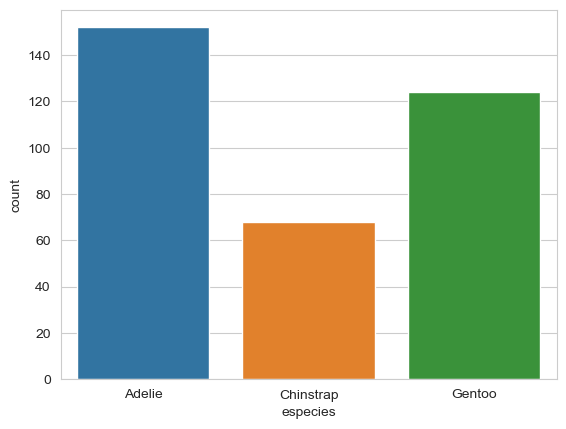

In [61]:
sns.countplot(data = df, x = 'especies')

### **Boxplot**

<Axes: xlabel='especies', ylabel='massa_corporal_g'>

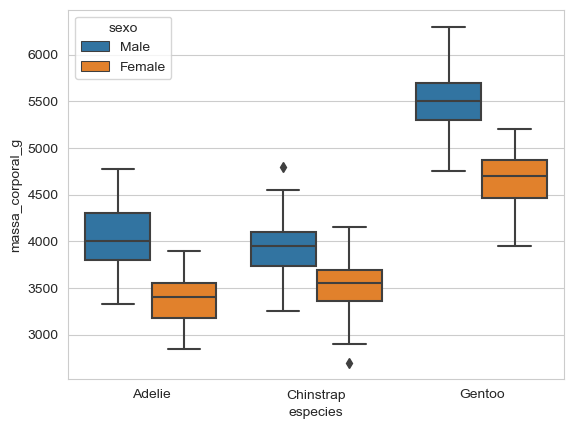

In [64]:
# Utilizado para detecção de outliers
sns.boxplot(data=df, x='especies', y='massa_corporal_g', hue='sexo')

### **Violinplot**

<Axes: xlabel='especies', ylabel='massa_corporal_g'>

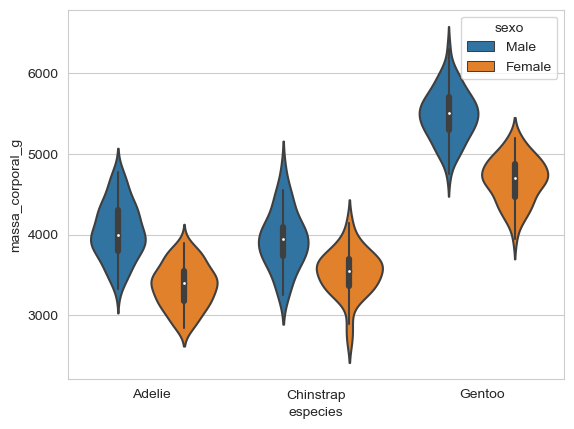

In [65]:
sns.violinplot(data=df, x='especies', y='massa_corporal_g', hue='sexo')

### **Heatmap**

C:\Users\lm584\AppData\Local\Temp\ipykernel_2096\2638349301.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

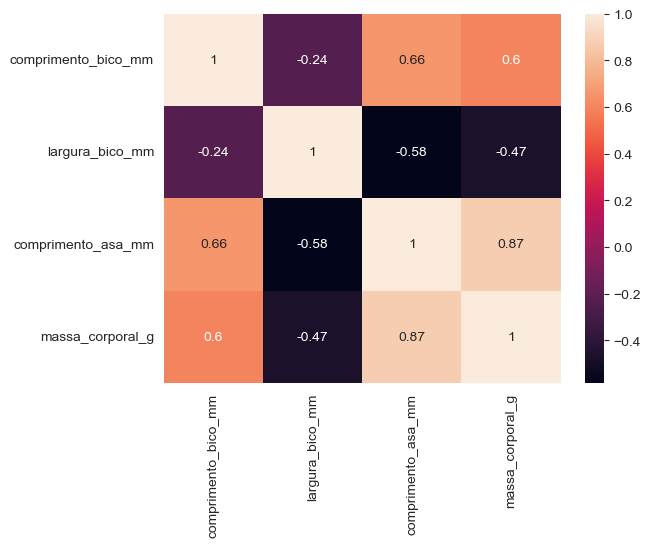

In [67]:
# Utilizamos o parametro 'annot=True' para retornar o rotulo de dados
sns.heatmap(df.corr(), annot=True)

### **Relplot**

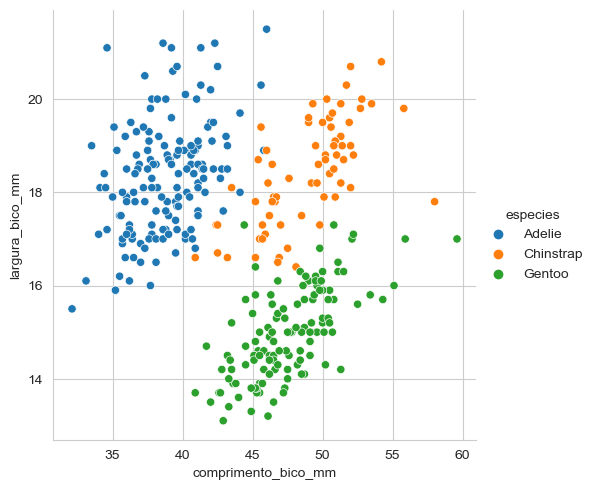

In [70]:
sns.relplot(data=df, x='comprimento_bico_mm', y='largura_bico_mm', hue='especies')

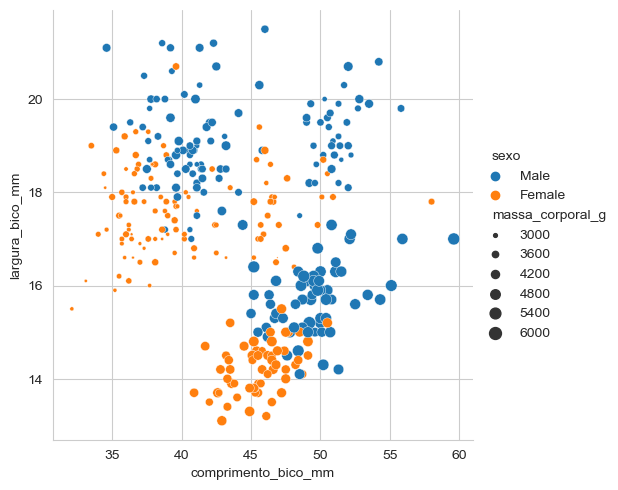

In [75]:
# Podemos alterar o tamanho dos datapoints com o parametro 'size'
sns.relplot(data=df, x='comprimento_bico_mm', y='largura_bico_mm', hue='sexo', size='massa_corporal_g', sizes=(1,80))

### **Scatterplot**

<Axes: xlabel='comprimento_bico_mm', ylabel='largura_bico_mm'>

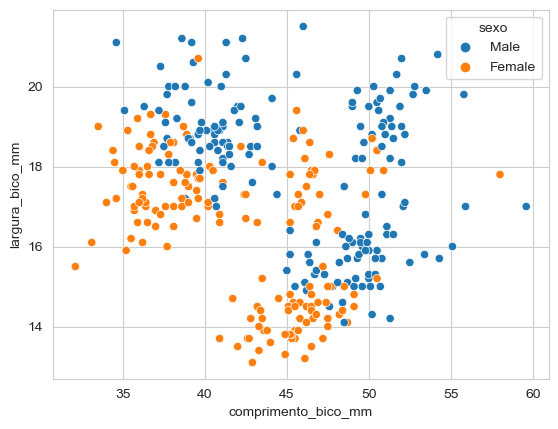

In [77]:
sns.scatterplot(data=df, x='comprimento_bico_mm', y='largura_bico_mm', hue='sexo')